# 신경망 모델 훈련

* 사이킷런의 머신러닝 알고리즘은 좋은 성능을 내기 위해서 매개변수를 조정하고 훈련을 반복한다. 
* 이런 알고리즘은 모델의 구조가 고정되어 있다고 느낄 수 있다. 
* 반면 딥러닝에서는 모델의 구조를 직접 만든다는 느낌이 훨씬 강하다. 
* 층을 추가하고, 층에 있는 뉴런의 갯수, 활성화 함수를 결정할 일들이 많다. 

In [ ]:
머신러닝 : 부스팅계열의 알고리즘을 조합해서. 미세하게 하이퍼파라미터 튜닝으로 성능 안정화

딥러닝 - 튜닝할수있는 폭이 넓고 성능 제어하는 방법이 더 많다

## 손실 곡선

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split

In [2]:

#데이터 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#데이터 전처리
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

#훈련, 검증 데이터 세트 분할
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)


In [3]:
#함수로 만들기 : 심층 신경망

def model_fn(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28))) # 입력층 1개
    model.add(Dense(100, activation='relu')) # 은닉층 1개
    model.add(Dense(10, activation='softmax')) # 출력층 1개
    return model

In [4]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=5) 

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5290 - accuracy: 0.8162
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3938 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3527 - accuracy: 0.8714
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3254 - accuracy: 0.8804
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3068 - accuracy: 0.8879


In [6]:
 # 훈련 측정값
print(epoch_hist.history.keys())

dict_keys(['loss', 'accuracy'])


In [7]:
epoch_hist.history['loss']# 내부로는 리스트로 가지고 있다 그 리스트를 시각화할 것

[0.5290348529815674,
 0.393778920173645,
 0.35266873240470886,
 0.32535532116889954,
 0.30676406621932983]

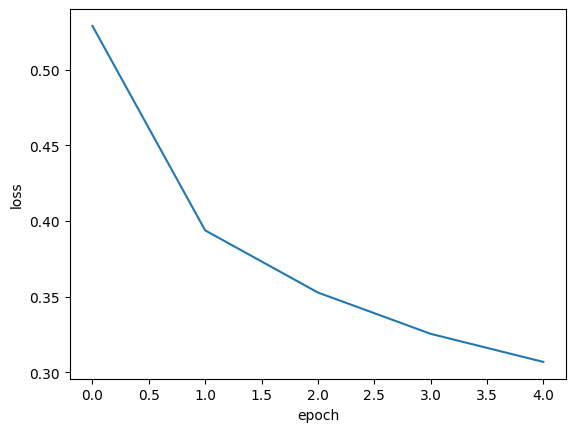

In [8]:
import matplotlib.pyplot as plt

#손실함수 값
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

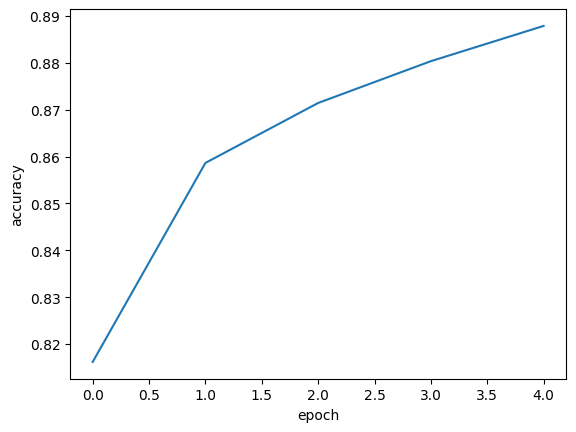

In [9]:
#정확도 그래프
plt.plot(epoch_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

> * 역시 에포크 마다 정확도가 올라간다. <br>
> * 에포크를 더 많이 해야겠다. 
> * 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 **손실함수**입니다. 

In [ ]:
# 손실함수를 기준으로 한다!

## epoch:20 일때 손실함수

In [ ]:
# 이런식으로하면 재학습된다 . 모델을 다시 생성해야 측정이 정확
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=5) 

In [11]:
# 에포크 20으로 증가

model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=20) 

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5222 - accuracy: 0.8170
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3922 - accuracy: 0.8591
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3507 - accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3263 - accuracy: 0.8816
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3064 - accuracy: 0.8860
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2909 - accuracy: 0.8931
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.8966
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9006
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2597 - accuracy: 0.9042
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.248

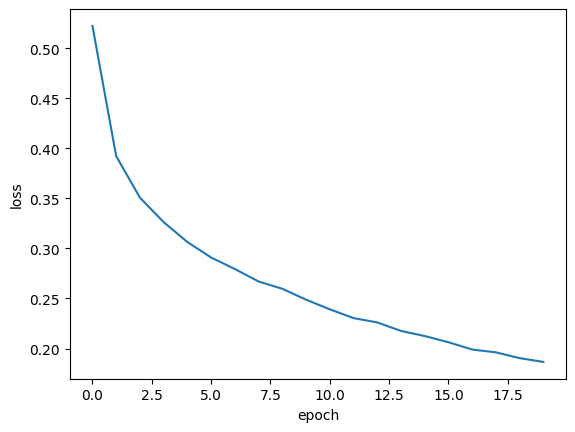

In [12]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

* 경사 하강법을 사용했을 때 과대/과소 적합과 에포크 사이의 관계를 알아봤다. 
* 인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 적용된다. 

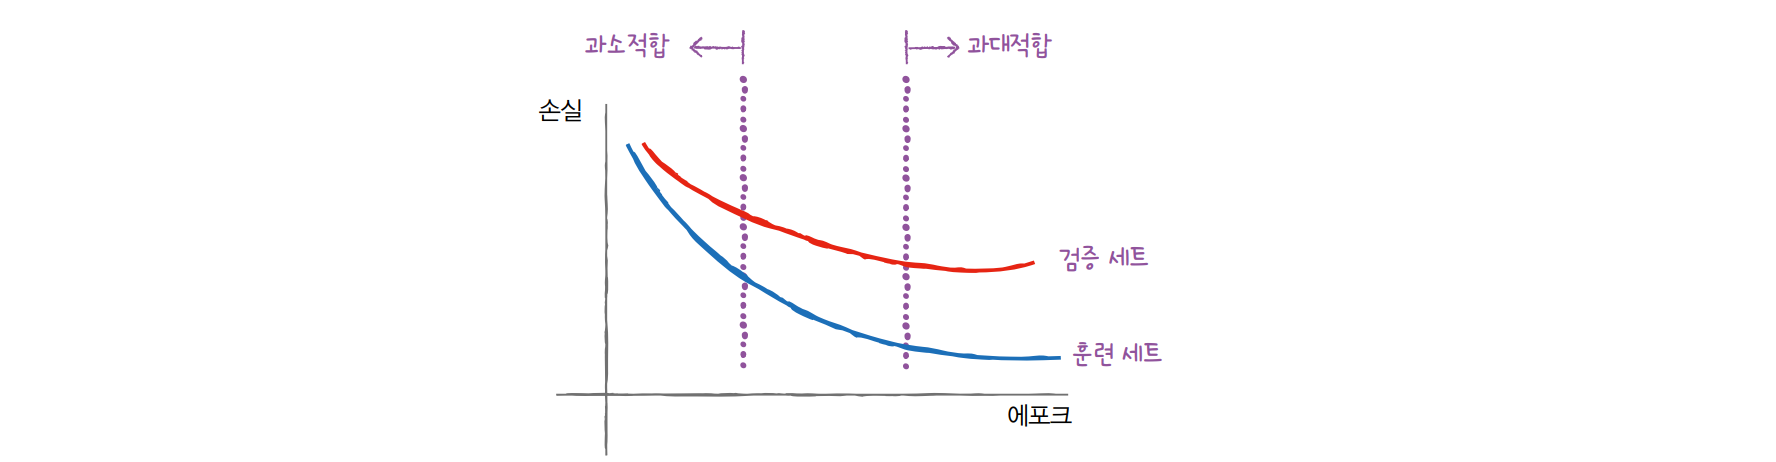

In [13]:
# 검증용 데이터 세트를 튜플로 전달한다.
# 옵티마이저 = RMSProp

model = model_fn()
model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics='accuracy')
epoch_hist = model.fit(train_scaled, y_train, epochs=20,
                       validation_data =(val_scaled, y_val)) 

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5315 - accuracy: 0.8116 - val_loss: 0.4418 - val_accuracy: 0.8407
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3949 - accuracy: 0.8564 - val_loss: 0.4019 - val_accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3562 - accuracy: 0.8732 - val_loss: 0.3838 - val_accuracy: 0.8617
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3311 - accuracy: 0.8805 - val_loss: 0.3741 - val_accuracy: 0.8742
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3200 - accuracy: 0.8857 - val_loss: 0.3991 - val_accuracy: 0.8591
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3080 - accuracy: 0.8902 - val_loss: 0.3679 - val_accuracy: 0.8730
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2991 - accuracy: 0.8945 - val_loss: 0.3768 - val_accuracy:

In [14]:
epoch_hist.history.keys() # 밸리데이션을 넣어서 값이 4개

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

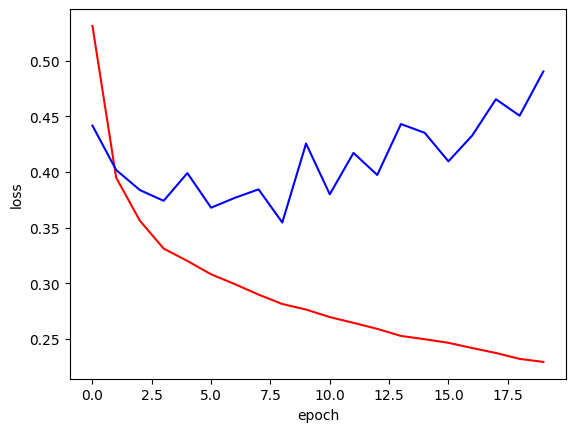

In [16]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'], color='r') # 훈련세트는 계속 로스가 내려감
plt.plot(epoch_hist.history['val_loss'], color='b') # 검증손실이 감소하다가 2~3에포크에서 다시 튀고 올라가서 퍼지는 형태 => 과대적합 우려
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증세트도 계속 로스를 내리려면, 튀는 시기가 늦춰지게 하려면 어떻게 해야할까?

In [ ]:
# 과대적합이 나타난 그래프

> * 실행결과가 달라질 수 있음 
> * 초기에 검증 손실이 감소하다가 3번째 에포크만에 다시 상승하기 시작한다.
> * 훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어 집니다. 
> * 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라
> * 검증 세트에 대한 정확도도 증가할 것 같다.


## 딥러닝에서의 과대적합 해결

과대적합을 막는 가장 간단한 방법은 모델의 규모를 축소하는 것입니다. 즉, 모델에 있는 학습 가능한 파라미터의 수를 줄입니다(모델 파라미터는 층(layer)의 개수와 층의 유닛(unit) 개수에 의해 결정됩니다). 딥러닝에서는 모델의 학습 가능한 파라미터의 수를 종종 모델의 "용량"이라고 말합니다. 직관적으로 생각해 보면 많은 파라미터를 가진 모델이 더 많은 "기억 용량"을 가집니다. 이런 모델은 훈련 샘플과 타깃 사이를 일반화 능력이 없는 딕셔너리와 같은 매핑으로 완벽하게 학습할 수 있습니다. 하지만 이전에 본 적 없는 데이터에서 예측을 할 땐 쓸모가 없을 것입니다. (뉴런, 레이어 줄여서 파라미터 선을 줄여야함)

반면에 네트워크의 기억 용량이 부족하다면 이런 매핑을 쉽게 학습할 수 없을 것입니다. 손실을 최소화하기 위해서는 예측 성능이 더 많은 압축된 표현을 학습해야 합니다.(웨이트가 증가해야한다) 또한 너무 작은 모델을 만들면 훈련 데이터를 학습하기 어렵울 것입니다. "너무 많은 용량"과 "충분하지 않은 용량" 사이의 균형을 잡아야 합니다.

안타깝지만 어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다. 여러 가지 다른 구조를 사용해 실험을 해봐야만 합니다.

알맞은 모델의 크기를 찾으려면 비교적 적은 수의 층과 파라미터로 시작해서 검증 손실이 감소할 때까지 새로운 층을 추가하거나 층의 크기를 늘리는 것이 좋습니다. 

In [ ]:
레이어를 적게 구성, 뉴런을 적게 구성하면 언더피팅이되어서, 뉴런 하나 레이어 추가하면 성능이 좋아지는걸 경험
그러나 
레이어가 많고 뉴런이 많으면 과적합 우려 -> 다시 규모를 줄여야함 = 파라미터(네트워크 선)를 줄여야함 = 뉴런과 레이어를 줄여야함

## 옵티마이저 종류와 성능

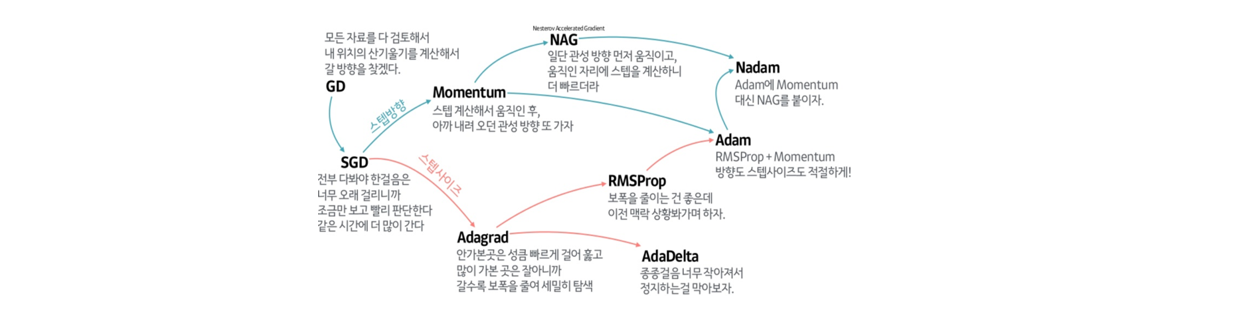

<center>
<img src="https://mlfromscratch.com/content/images/2019/12/saddle.gif" width="400" height="300"  />
</center>




In [ ]:
옵티마이저의 종류에 따라 속도가 많이 달라짐 개별적인 속도 순서는데이터에 따라 달라짐

## 과대적합 방지: 옵티마이저 조정

In [17]:
# 옵티마이저 Adadelta사용해보기
model = model_fn()

model.compile(optimizer='Adadelta', loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=20,
                       validation_data =(val_scaled, y_val)) 

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 2.2850 - accuracy: 0.1460 - val_loss: 2.1333 - val_accuracy: 0.2122
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 2.0114 - accuracy: 0.3144 - val_loss: 1.8999 - val_accuracy: 0.4238
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7968 - accuracy: 0.5021 - val_loss: 1.7072 - val_accuracy: 0.5422
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6195 - accuracy: 0.5754 - val_loss: 1.5494 - val_accuracy: 0.5902
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.4759 - accuracy: 0.6119 - val_loss: 1.4229 - val_accuracy: 0.6177
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.3614 - accuracy: 0.6340 - val_loss: 1.3221 - val_accuracy: 0.6350
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.2700 - accuracy: 0.6483 - val_loss: 1.2412 - val_accuracy:

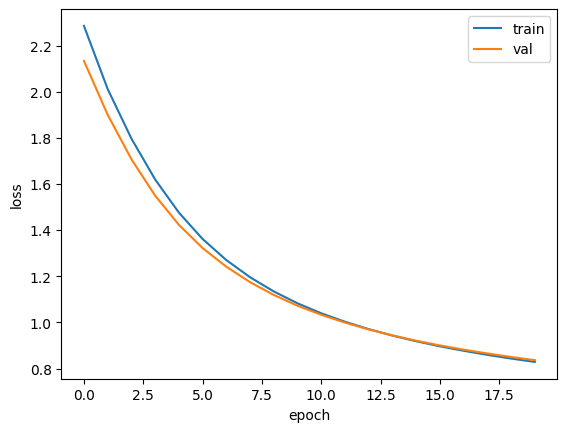

In [18]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'], label='train') 
plt.plot(epoch_hist.history['val_loss'], label='val') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# 학습이 잘 안된다. 에프크가 더 필요하다ㅏ. 손실 정확도 수치자체가 안좋음. 아다델타는 실패

In [19]:
# 옵티마이저 Adam 사용하기
model = model_fn()

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=20,
                       validation_data =(val_scaled, y_val)) 
# 앞의 두개는 훈련데이터, val~ 검증용데이터

Epoch 1/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5290 - accuracy: 0.8138 - val_loss: 0.4473 - val_accuracy: 0.8353
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3942 - accuracy: 0.8594 - val_loss: 0.3908 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3559 - accuracy: 0.8704 - val_loss: 0.3621 - val_accuracy: 0.8686
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3261 - accuracy: 0.8789 - val_loss: 0.3441 - val_accuracy: 0.8741
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3053 - accuracy: 0.8867 - val_loss: 0.3460 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2908 - accuracy: 0.8919 - val_loss: 0.3278 - val_accuracy: 0.8824
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8955 - val_loss: 0.3459 - val_accuracy:

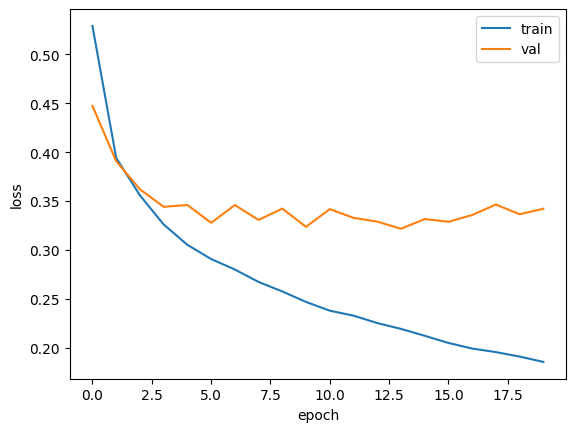

In [20]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'], label='train') 
plt.plot(epoch_hist.history['val_loss'], label='val') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
# 옵티마이저의 효과:
# rms프로프 2.5/0.35였는데 
# 아담으로 바꾸니 로스가 0.35보다 줄고 에포크도 5~7정도로 늘림
# -> 과대적합이 일어나는 포인트를 지연시켜서 좀 더 로스를 줄임
# 이 데이터에서는 아다델타, rms프롭보다 아담이 더 적합

> 검증 손실 그래프에 여전히 요동이 있지만 10번째 에포크까지 감소 추세가 이어지고 있다. <br>
> Adam 옵티마이저가 이 데이터 셋에 잘 맞는다는 것을 보여준다. <br>
> 더 나은 곡선을 얻기위해서는 학습률을 조정에 도전!!


## 과대적합 방지: 옵티마이저 조정 + 학습률 튜닝

In [21]:
model = model_fn()

adam = keras.optimizers.Adam(learning_rate=0.01) # 학습률을 올림(성큼성큼) : 오차를 더 반영하겠다 # defalut: 0.001

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=20,
                       validation_data =(val_scaled, y_val)) 

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5320 - accuracy: 0.8119 - val_loss: 0.4762 - val_accuracy: 0.8292
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4393 - accuracy: 0.8411 - val_loss: 0.4454 - val_accuracy: 0.8461
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4201 - accuracy: 0.8504 - val_loss: 0.4461 - val_accuracy: 0.8465
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4068 - accuracy: 0.8539 - val_loss: 0.4523 - val_accuracy: 0.8438
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3950 - accuracy: 0.8565 - val_loss: 0.4146 - val_accuracy: 0.8518
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8634 - val_loss: 0.4192 - val_accuracy: 0.8535
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8661 - val_loss: 0.4051 - val_accuracy:

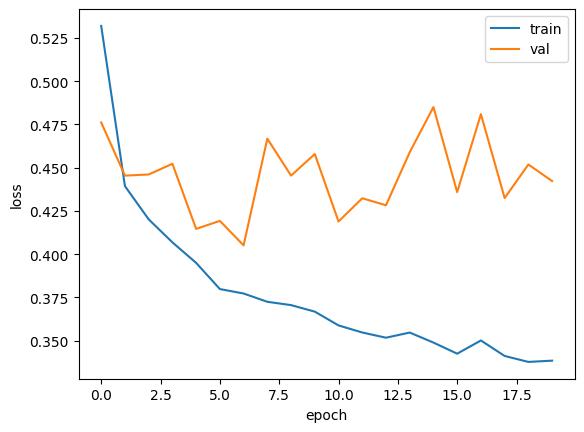

In [22]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'], label='train') 
plt.plot(epoch_hist.history['val_loss'], label='val') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
성큼성큼해서 과소적합  방지했던 케이스 있었음

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9244 - accuracy: 0.6932 - val_loss: 0.9973 - val_accuracy: 0.6123
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9056 - accuracy: 0.6688 - val_loss: 0.9224 - val_accuracy: 0.6271
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9065 - accuracy: 0.6579 - val_loss: 0.8370 - val_accuracy: 0.6702
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9298 - accuracy: 0.6492 - val_loss: 1.0215 - val_accuracy: 0.6227
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9233 - accuracy: 0.6646 - val_loss: 0.9604 - val_accuracy: 0.6594
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9108 - accuracy: 0.6517 - val_loss: 0.9770 - val_accuracy: 0.6044
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.9320 - accuracy: 0.6499 - val_loss: 1.1978 - val_accuracy:

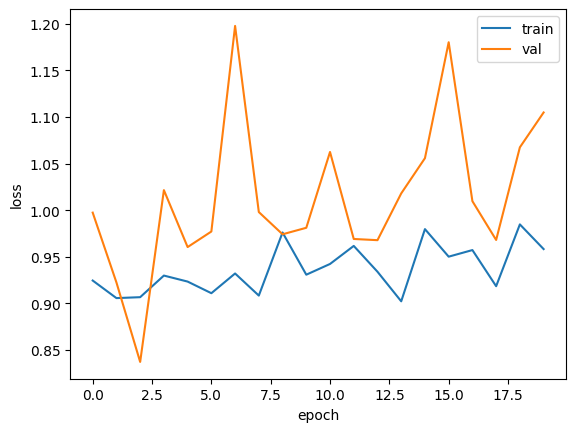

In [23]:
model = model_fn()

adam = keras.optimizers.Adam(learning_rate=0.05) # 학습률을 올림(성큼성큼) : 오차를 더 반영하겠다 # defalut: 0.001

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=20,
                       validation_data =(val_scaled, y_val)) 

plt.plot(epoch_hist.history['loss'], label='train') 
plt.plot(epoch_hist.history['val_loss'], label='val') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()         # 엉망진창으로 널뛰는구나~~  

> 학습률 조정이 과대적합을 방지할 수 있지만, 적정한 튜닝값을 찾기에 쉽지 않다.

## 드롭아웃

* 랜덤하게 은닉층의 뉴런이 드롭아웃된다. 
* 드롭아웃은 과대적합을 막는다. 
* 이전 층의 뉴런이 랜덤하게 꺼지면서 특정 뉴런에 과대하게 의존하는 것을 줄이고, 모든 입력에 대해 주의를 기울여야 하기 때문이다. 

* 마치 2개의 신경망을 앙상블 하는 것과 같다. 
* 앙상블은 과대적합을 막는데 아주 좋은 기법이다. -> 일반화에 효용이 좋다 


In [ ]:
# 푸틴의 참모에 비유

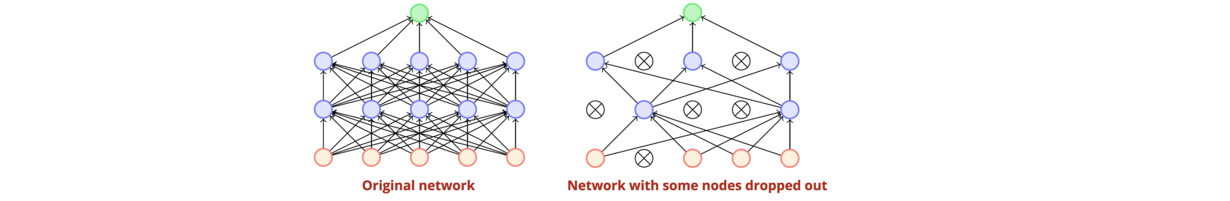

In [ ]:
학습하다보니 하나의 뉴런에 대해 많은 영향이 작용해 웨이트가중치가 커지더라
일반화에서는 몇몇노드의 웨이트에 의존되어서 효용이 떨어지더라
그래서 부분적으로 꺼서 학습을 적절하게 시켜주는 것이다 그게 드롭다운

<center>
<img src="http://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif" width="400" height="300"  />
</center>

In [24]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

# 층 하나를 추가하고, 30%정도를 드롭아웃한다. 
# 즉 훈련되는 파라미터가 없도록 30퍼센트는 끈다. (훈련시만 드롭아웃 적용, 검증 시에는 드롭아웃 하지않음)
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

history = model.fit(train_scaled, y_train, epochs=20,
                    validation_data=(val_scaled, y_val)) 

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5928 - accuracy: 0.7923 - val_loss: 0.4223 - val_accuracy: 0.8478
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4400 - accuracy: 0.8426 - val_loss: 0.3931 - val_accuracy: 0.8558
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4041 - accuracy: 0.8543 - val_loss: 0.3704 - val_accuracy: 0.8651
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3831 - accuracy: 0.8606 - val_loss: 0.3453 - val_accuracy: 0.8776
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3656 - accuracy: 0.8655 - val_loss: 0.3530 - val_accuracy: 0.8708
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3537 - accuracy: 0.8697 - val_loss: 0.3390 - val_accuracy: 0.8801
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3444 - accuracy: 0.8735 - val_loss: 0.3369 - val_accuracy:

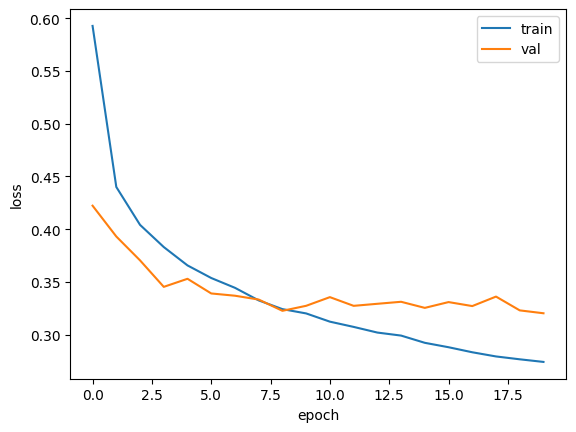

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 아직 튀어오르지않음 에포크를 더 올려도 아직 과적합 위험은 아닌듯하다. 
# 로스줄고 에포크 늘었다. 정확도도 약간 늘었다.

> 과대적합이 확실이 많이 줄었다. 
>  에포크 10회 이상이 되더라도 다소 검증 손실의 감소 추세가 떨어지기는 했지만 그래도 크게 상승하지는 않고 어느 정도 유지되고 있다. 

>  적정한 에포크 횟수를 알았으니 10회로 훈련해야겠다. 

## 모델 저장과 복원

In [ ]:
# 여기까지 학습시키고 모델을 배포하려는 경우

In [27]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

model.add(Dropout(0.3)) # 층 하나를 추가한다. 30%정도를 드롭아웃한다.  훈련되는 파라미터는 없다. 검증시에는 드롭아웃 하지 않고, 훈련시에만 드롭아웃 기능 사용
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
#에포크 10회로 조정
history = model.fit(train_scaled, y_train, epochs=10,verbose=0,
                    validation_data=(val_scaled, y_val)) 

                    # verbose=0이 뭐지

In [29]:
 #훈련된 모델의 파라미터를 저장함 
model.save_weights('./model/mnist_fashion_weights.h5') # 경로 지정

# 훈련된 모델의 웨이트들만 들어있는 파일이 생성됨

In [30]:
#모델 구조와 모델 파라미터를 함께 저장 HDF5 포맷으로 저장
model.save('./model/mnist_fashion_whole.h5')

# 네트워크까지 포함한 모델 파일이 생성됨

In [ ]:
https://soundprovider.tistory.com/entry/tensorflow-20-modelsave-modelsaveweights-%EC%B0%A8%EC%9D%B4

## 모델 복원: 가중치 활용

In [ ]:
# 껏다 켜서 여기서부터

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 훈련하지 않은 새로운 모델에 저장해둔 파라미터들을 적재해서 

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

model.add(Dropout(0.3)) # 층 하나를 추가한다. 30%정도를 드롭아웃한다.  훈련되는 파라미터는 없다. 검증시에는 드롭아웃 하지 않고, 훈련시에만 드롭아웃 기능 사용
model.add(Dense(10, activation='softmax'))



In [3]:
# fit하지않고 웨이트만 가져와서 
model.load_weights('./model/mnist_fashion_weights.h5')

In [6]:
# 예측하려는데 nameerror나서 실행
#데이터 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#데이터 전처리
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

#훈련, 검증 데이터 세트 분할
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)


In [7]:
# 예측 : 검증용 데이터로 실행하려는 찰나이다
pred = model.predict(val_scaled)

375/375 [==============================] - 0s 671us/step


In [8]:
# 10개 클래스에 대한 확률이 들어 있다. 
pred.shape # 12000개의샘플데이터에 10개의 클래스가 있다

(12000, 10)

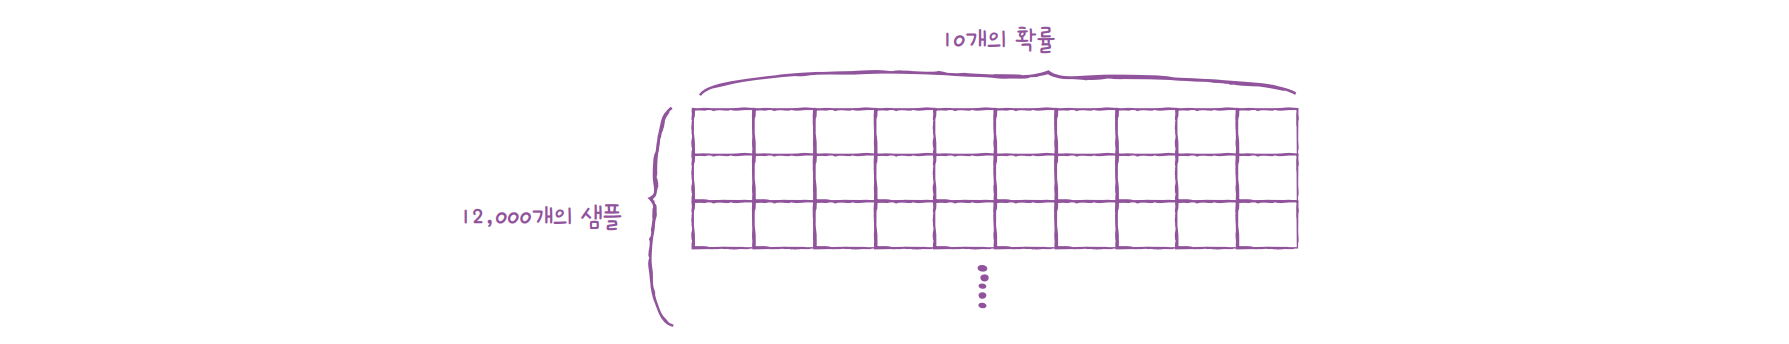

In [9]:
#10개의 클래스에 대한 예측 확률
pred[0]

# 가장 큰 값이 9.9997604e-01이네

array([9.5726382e-10, 7.3199653e-18, 3.4195809e-11, 2.3128000e-13,
       3.0836017e-10, 2.3871116e-05, 5.3195854e-11, 5.1905303e-08,
       9.9997604e-01, 1.7773157e-12], dtype=float32)

In [10]:
#가장 큰 값이 있는 인덱스, 8인덱스의 클래스
import numpy as np
np.argmax(pred[0]) # 가장 큰 값이 있는 인덱스를 반환

8

In [11]:
# 10개중에 가장 큰 값
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
val_labels # 10개중에 가장 큰 값

# 12000개 샘플중에서 

375/375 [==============================] - 0s 687us/step


array([8, 8, 7, ..., 8, 8, 6], dtype=int64)

In [12]:
#예측값과 실제값 비교
val_labels[4], y_val[4]

(8, 8)

In [13]:
val_labels[999], y_val[999]

(4, 4)

In [14]:
val_labels == y_val # 같은 것을 추렸을 경우

array([ True,  True,  True, ...,  True,  True, False])

In [15]:
val_labels[11999], y_val[11999] # 결과값과 실제값이 틀린경우도 있다

(6, 1)

In [17]:
 #예측값과 실제값이 맞은 평균
np.mean(val_labels == y_val)

0.8771666666666667

In [ ]:
네트워크 구성했는데 
핏하지않고 이미 훈련완료된 모델을 얹어서
예측을 했다
-> 모델을 활용하는 단계에서 사용하는 코드

### 모델 재활용

In [18]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)

In [20]:
X_test_scaled =  X_test/255.0 # 훈련용 데이터에 적용했던 전처리를 테스트데이터에 동일하게 적용시켜야한다
# 정규화 전처리 : 0~1사이값으로 만듬

model.evaluate(X_test_scaled, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [22]:
X_test_scaled =  X_test/255.0 # 훈련용 데이터에 적용했던 전처리를 테스트데이터에 동일하게 적용시켜야한다
# 정규화 전처리 : 0~1사이값으로 만듬

model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 790us/step - loss: 0.3629 - accuracy: 0.8709


[0.36289241909980774, 0.8708999752998352]

In [23]:
import numpy as np

test_labels = np.argmax(model.predict(X_test_scaled), axis=-1)
test_labels[3],y_test[3] #예측값과 실제값 비교

313/313 [==============================] - 0s 673us/step


(1, 1)

## 콜백과 조기종료

* 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체입니다. 


* ModelCheckpoint
    * 최상의 검증 점수를 낸 그 순간의 가중치를 자동으로 저장해 줍니다. 
* EarlyStopping
    * 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료라고 합니다.
    * 에포크가 남아있어도 학습을 중단해 줍니다. 


* 그러면 자원을 아낄 수 있습니다.
* 조기 종료는 에포크 횟수를 제한하는 역할도 하지만
* 모델이 과적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수 있습니다. 


In [86]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

model.add(Dropout(0.3)) # 층 하나를 추가한다. 30%정도를 드롭아웃한다.  훈련되는 파라미터는 없다. 검증시에는 드롭아웃 하지 않고, 훈련시에만 드롭아웃 기능 사용
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(train_scaled, y_train, epochs=20, verbose=1,
                    validation_data=(val_scaled, y_val))

In [88]:
# 몇 번째 에포크에서 훈련이 중지 되었는지..


7


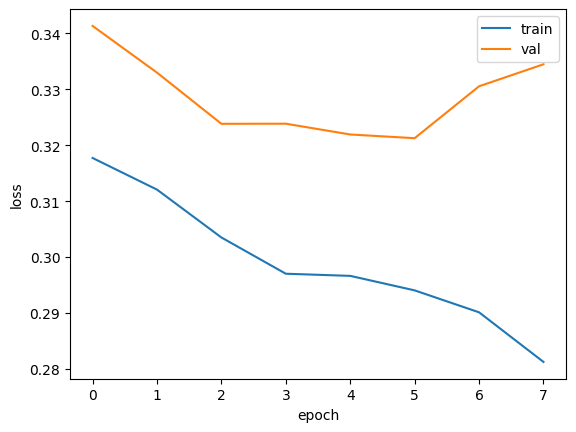

In [91]:
# 최적의 상태일 때 모델을 저장해주기 때문에 검증 세트로 확인


313/313 [==============================] - 0s 939us/step - loss: 0.3555 - accuracy: 0.8791


[0.355545312166214, 0.8791000247001648]

# 종합코드

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.7640 - val_loss: 0.4684 - val_accuracy: 0.8366
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.8368 - val_loss: 0.4075 - val_accuracy: 0.8568
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8488 - val_loss: 0.3847 - val_accuracy: 0.8629
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.8602 - val_loss: 0.3672 - val_accuracy: 0.8671
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8641 - val_loss: 0.3618 - val_accuracy: 0.8700
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8696 - val_loss: 0.3449 - val_accuracy: 0.8755
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8730 - val_loss: 0.3415 - val_accuracy: 0.8762
Epoch 

[0.3194139301776886, 0.8824166655540466]

In [26]:
X_test_scaled = X_test / 255.0

model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 995us/step - loss: 0.3445 - accuracy: 0.8754


[0.34445440769195557, 0.8754000067710876]

## 심화

* Dense층의 개수를 늘리고, 그 안의 units 개수를 조정하여 성능향상을 시도하세요.
* 배치 사이즈를 조정하여 성능향상을 시도하세요.